In [1]:
import networkx

<h1 align="center">BFS ALGHORITM  TO  MEASURE  DISTANCE  AMMONG STARTING  NODE IN TERRORIST  NETWORK</h1> 

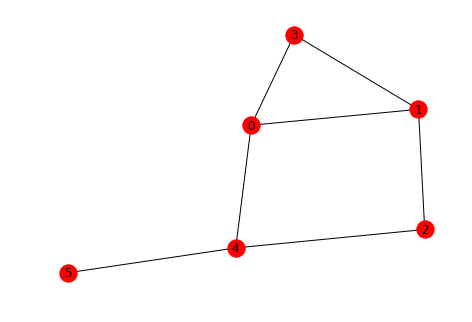

In [1]:
import networkx
graph={0:set([1,3,4]),
      1:set([0,2,3]),
      2:set([1,4]),
      3:set([0,1]),
      4:set([0,2]),
      5:set([4])
     }
g = networkx.Graph()
import  matplotlib 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
g.add_nodes_from(list(graph.keys()))
for  vertex  in graph:
 
    for  edge in list(set(graph[vertex])):
     
        g.add_edge(vertex,edge)

 
networkx.draw(g,with_labels = True)

In [2]:
def compute_in_degrees(digraph):
    in_degrees={}
    for   node in  digraph.keys():
        degree=0
        #compute    in degreee for particular node
        for out_degree in digraph.values():
            for element in out_degree:
                if element==node:
                    degree+=1
        in_degrees[node]=degree
    return in_degrees

In [3]:
from collections import deque

In [4]:

def bfs_visited(ugraph,start_node):
    import  math
    """Takes the undirected graph ugraph and the node start_node 
    and returns the set consisting of all nodes that are visited by a breadth-first search that starts at start_node."""
    queue=[]
    distances=[math.inf for node in ugraph.keys()]
    i=start_node
    distances[i]=0
    queue.append(i)
    visited=set([start_node])
    while len(queue)!=0:
        
 
        j=queue[0]
        queue.pop(0)
        for edge in (ugraph[j]):
           
 
            if edge not in visited :
                visited.add(edge)
                if distances[j]!=math.inf:
                    distances[edge]=distances[j]+1
                queue.append(edge)
 
                
   
    return  visited,distances

In [5]:
bfs_visited(graph,5)

({0, 1, 2, 3, 4, 5}, [2, 3, 2, 3, 1, 0])

<h1 align="center">CC-VISITED ALGHORITM FOR  DETERMINING  CONNECTED  COMPONENTS OF  TERRORIST NETWORK</h1> 

In [6]:
terr_components={0:set([1,2]),
                 1:set([0,2]),
                 2:set([0,1]),
                 3:set([4]),
                 4:set([3]),
                 5:set([])
     }

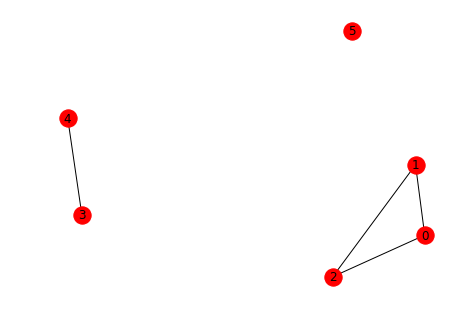

In [7]:
g = networkx.Graph()
import  matplotlib 
 
g.add_nodes_from(list(terr_components.keys()))
for  vertex  in graph:
 
    for  edge in list(set(terr_components[vertex])):
     
        g.add_edge(vertex,edge)

 
networkx.draw(g,with_labels = True)

In [8]:
def bfs_visited(ugraph,start_node):
    import  math
    """Takes the undirected graph ugraph and the node start_node 
    and returns the set consisting of all nodes that are visited by a breadth-first search that starts at start_node."""
    queue=[]
    distances=[math.inf for node in ugraph.keys()]
    i=start_node
    distances[i]=0
    queue.append(i)
    visited=set([start_node])
    while len(queue)!=0:
        
 
        j=queue[0]
        queue.pop(0)
        for edge in (ugraph[j]):
           
 
            if edge not in visited :
                visited.add(edge)
                if distances[j]!=math.inf:
                    distances[edge]=distances[j]+1
                queue.append(edge)
 
                
   
    return  visited
import  random
def cc_visited(ugraph):
    remaining_nodes=list(ugraph.keys())
    remaining=set(remaining_nodes)
    connected=[]
    while len(remaining) > 0:
        node_i = random.sample(remaining, 1)[0]
        current = bfs_visited(ugraph, node_i)
        connected.append(current)
        for node in current:
            remaining.remove(node)
    
 
    return connected

In [9]:
cc_visited(terr_components)

[{0, 1, 2}, {3, 4}, {5}]

<h1 align="center">Largest Connected Component in Terrorist Network</h1> 

In [10]:
import numpy  as np
def largest_cc_size(ugraph):
    connect_terr=cc_visited(terr_components)
    return  np.max([len(terrorist_cell) for terrorist_cell in connect_terr])
    

In [11]:
 largest_cc_size(terr_components)

3

<font color='blue'><h1 align="center">Terrorist  Network Resilience .This  is the core module of  our  analysis</h1> 
</font>

<font color='black'><h4 align="center">In the Application component of this analysis, we will study the connectivity of Terrorist Networks. </h2>

<h4 align="center">In particular, we will subject a model of one particular network to random and targeted ATTACKS. These attacks correspond to disabling a sequence of Terrorists in the network and will be simulated by removing a sequence of nodes in the graph that corresponds to these Terrorists.</h2>

<h4 align="center">For this part of the  analysis  we  implemented a function that takes an terrorist network  and a list of individual terrorists  that will be attacked. We will remove these terrorists (and their connections) from the terrotist network one at a time and then measure the "resilience" of the network at each removal by computing the size of its largest remaining connected component.  

<h4 align="center">compute_resilience(ugraph, attack_order) - Takes the undirected terrorist network, a list of nodes attack_order and iterates through the nodes in attack_order. For each node in the list, the function removes the given node and its edges from the graph and then computes the size of the largest connected component for the resulting graph. The function should return a list whose k+1th entry is the size of the largest connected component in the graph after the removal of the first k nodes in attack_order. The first entry (indexed by zero) is the size of the largest connected component in the original graph.

<h4 align="center">The easiest method for implementing compute_resilience is to remove one node at a time and use largest_cc_size to compute the size of the largest connected component in the resulting graphs. This implementation has a running time of O(n(n+m)) where n is the number of nodes and m is the number of edges in the graph.</h2> 
</font>

In [12]:
def compute_resilience(ugraph, attack_order):
  
    sizes = []
    remaining = ugraph.copy()
    sizes.append(largest_cc_size(n))
    
 
    for node in attack_order:
        remaining.pop(node)
        for nodes in remaining:
            remaining[nodes].discard(node)
        sizes.append(largest_cc_size(remaining))
    
 
    return sizes

<font color='blue'><h1 align="center">APPLICATION ANALYSIS</h1> 
</font>

In this Application, we will compute the resilience of several types of undirected graphs.
 

In [16]:
#Terrorist  Network 
url='http://storage.googleapis.com/codeskulptor-alg/alg_rf7.txt'

In [17]:
def load_graph(url):
    answer_graph={}
    import urllib.request
    with urllib.request.urlopen(url) as url:
        s = url.read()
        data=s.decode('utf8')
        data=data.split('\r\n')
    for citation in range((len(data)-1)):
        #print(citation)
        
        current_citation=data[citation].split(' ')
        answer_graph[int(current_citation[0])]=set([int(elem )for elem in  current_citation[1:-1]])
    return answer_graph

 

import timeit

start = timeit.timeit()
answer_graph=load_graph(url)
end = timeit.timeit()
print("elappsed time is better  then   codeskulptor ",end-start)

elappsed time is better  then   codeskulptor  0.00021299500076565892


In [21]:
graph=answer_graph
len(graph)

1239

In [119]:
#1)er   graphs
import itertools
def ER(n, p):
    graph = {key: set() for key in range(n)}
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            if random.random() < p:
                graph[i].add(j)
                graph[j].add(i)

    return graph

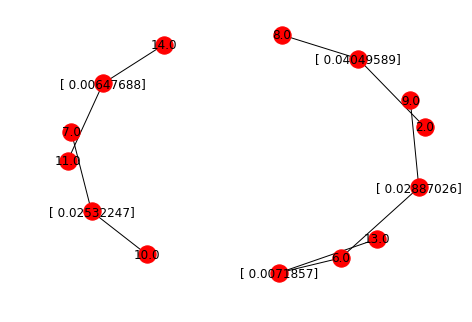

In [60]:
er=ER(15,0.05)
er
 
g = networkx.Graph()
import  matplotlib 
 
g.add_nodes_from(list(er.keys()))
for  vertex  in er:
 
    for  edge in list(set(er[vertex])):
     
        g.add_edge(vertex,edge)

 
networkx.draw(g,with_labels = True)

In [41]:
ER[1]

array([ 0.,  1.,  2.])

In [27]:
def  make_complete_graph(num_nodes):
    complete_graph={}
    for  node in range(num_nodes):
        complete_graph[node]=set(range(num_nodes))-{node}
    return complete_graph

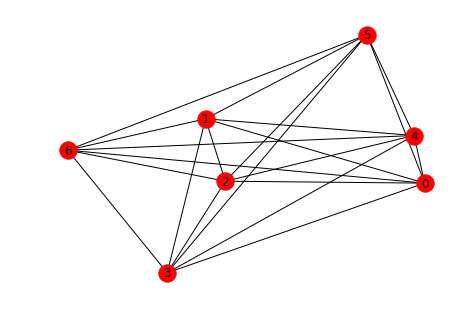

In [38]:
#2)complete graphs
complete_graph=make_complete_graph(7)
g = networkx.Graph()
import  matplotlib 
 
g.add_nodes_from(list(complete_graph.keys()))
for  vertex  in complete_graph:
 
    for  edge in list(set(complete_graph[vertex])):
     
        g.add_edge(vertex,edge)

 
networkx.draw(g,with_labels = True)

In [140]:
#3  upa    graphs
def make_complete_graph(num_nodes):
    """Make undirected graph where each node is connected to all other nodes"""
    def all_but(num_n, num_i):
        """Make a list of all numbers upto n excluding ith"""
        return [num_x for num_x in range(num_n) if num_x != num_i]

    return {num_i: set(all_but(num_nodes, num_i))
            for num_i in range(num_nodes)}

class UPATrial:
    """
    Simple class to encapsulate optimizated trials for the UPA algorithm
    Maintains a list of node numbers with multiple instance of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    Uses random.choice() to select a node number from this list for each trial.
    """

    def __init__(self, num_nodes):
        """
        Initialize a UPATrial object corresponding to a
        complete graph with num_nodes nodes
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]

    def run_trial(self, num_nodes):
        """
        Conduct num_nodes trials using by applying random.choice()
        to the list of node numbers
        Updates the list of node numbers so that each node number
        appears in correct ratio
        Returns:
        Set of nodes
        """

        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for _ in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))

        # update the list of node numbers so that each node number
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        for dummy_idx in range(len(new_node_neighbors)):
            self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))

        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors
def upa(n, m):
    graph = make_complete_graph(m)
    upa = UPATrial(m)
    for i in range(m, n):
        neighbors = upa.run_trial(m)
        graph[i] = neighbors
        for neighbor in neighbors:
            graph[neighbor].add(i)
    return graph

 <font color='blue'><h2 align="center">    Question 1  

To begin our analysis, we will examine the resilience of the terrotist network under an attack in
 which terrorist are chosen at random. 
We will then compare the resilience of the network to the resilience of ER and UPA graphs of similar size.</h2> 
</font>


In [ ]:
To begin, we should determine the probability p such that the ER graph computed using this edge probability has
approximately the same number of edges as the terrorist  network. (TERRORIST  NETWORK  HAS 3074 CONNECTIONS)
(the choice for p should be consistent with considering each edge in the undirected graph exactly once, not twice.)

Likewise, WE should compute an integer m such that the number of edges in the UPA graph is close to the number of
edges in the terroist network. Remember that all three graphs being analyzed in this Application 
should have the same number of nodes and approximately the same number of edges.

In [ ]:
DPA algorithm adds m edges to the graph, a good choice for m is an integer that is close to the average degree of 
terrorist network

In [64]:
n=len(graph)
print(n)

1239


3047.0

Average  of terrorist network  degrees  is  : 4.9184826473


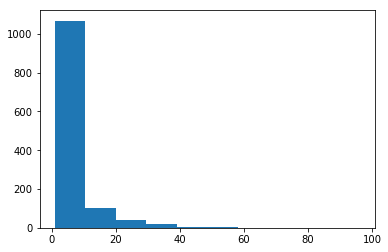

In [81]:
#determining mean  of   edge degree
list(graph.values())[0:3]
connections=list(graph.values())
degrees=[len(conn) for conn  in connections]
import matplotlib  as plt
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(degrees)
print("Average  of terrorist network  degrees  is  :",np.mean(degrees))

In [ ]:
Next, weshould write a function random_order that takes a graph and returns a list of the nodes in the graph in some
random order. 
Then, for each of the three graphs (computer network, ER, UPA), compute a random attack order using random_order
and use this attack order in compute_resilience to compute the resilience of the graph.

In [87]:
def  random_order(graph,num_nodes):
    return np.random.choice(list(graph.values()),num_nodes)
    

In [156]:
er = ER(1347,0.0039)

In [157]:
edges=(list(er.values()))
np.sum([len(edge) for edge in edges])

14450

In [148]:
up=upa(1347,2)

In [149]:
edges=(list(up.values()))
np.sum([len(edge) for edge in edges])

5372